<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/CU/Lab4_Curie_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4. Ferromagnetic phase transition. Solution book

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0 as mu0
from scipy.optimize import curve_fit
from scipy.stats import norm

## Introduction

The magnetic field $B$ is defined via the intensity of the magnetic field $H$ using the following
relation:
$$
B = \mu_0(1+ \chi_r) H = \mu_0 \mu_r H; \quad \mu_r = 1+\chi_r; \quad \chi_r = M / H
\tag{1}
$$
where

$M$  magnetization of the material, in Ampere per meter

$H$  the intensity of the magnetic field, in Ampere per meter

$\chi_r$ magnetic susceptibility

$\mu_0$ magnetic permeability in vacuum

$\mu_r$ relative magnetic permeability


## Magnetic materials


**Diamagnetic**: materials with magnetization opposed to the external field, $\chi_r$ is negative. Usually a very weak effect,
$\chi_r$ typically in order of $-10^{-4}$.

Diamagnetism is attributed to atomic materials with no magnetic moment and, usually is
temperature independent.


**Paramagnetic**: materials with magnetization along the direction of an external field,
$\chi_r$ is positive.
Relatively weak effect,
$\chi_r$  typically up to $+10^{-2}$.

Paramagnetism is attributed to atomic or molecular materials with a magnetic moment (unpaired
electrons), but lacks a substantial interaction among the dipoles. Thus, can be arranged along the
external magnetic field. The magnetization becomes weaker with temperature rises (harder to
arrange the magnetic moments). The magnetization vanishes in absence of an external magnetic
field.


**Ferromagnetic**: materials with magnetization along the direction of an external field (similarly to
paramagnets),
$\chi_r$ is positive. Strong effect typically
$\chi_r$
is about $10^3$ and it does not vanish upon
extinction of the external magnetic field. This is a type of material magnetic compasses or fridge
magnets are made of.

Ferromagnetic material have macroscopic interactions of magnetic moments. These moments not
only are align according external field, they create additional field influencing the neighboring
moments. Thus, when the external field is off, the magnetization remains.

This phenomenon is temperature dependent and it disappears at a certain temperature called the
*Curie point*.



## Electromotive force


The Faraday law relates the change in flux through conducting loop 𝚽 to the electromotive force:
$$
\varepsilon_{loop} = - \frac{d\Phi}{dt}.
\tag{2}
$$
The flux through conducting loop defined as:
$$
\Phi = \iint  \vec B \cdot \hat n dS
\tag{3}
$$
where $S$ is the loop area. For a coil with $N$ loops:
$$
\varepsilon_{coil} = - N \frac{d\Phi}{dt}.
\tag{4}
$$
The coil inductance $L$ defined as the ratio between the magnetic flux and the current inducing the magnetic field:
$$
L = \frac{\Phi}{I}
\tag{5}
$$
The ratio between inductance and electromotive force is:
$$
\varepsilon = - N L \frac{dI}{dt}
\tag{6}
$$
Given the coil core of certain material with relative magnetic permeability
$\mu_r$, the flux through
the coil is (from eq. (1) and (3)):
$$
\Phi_m = \mu_r \Phi_V
\tag{7}
$$
For a system composed of various materials, for example air and ferromagnetic material, the total
flux will be given according to superposition principle (shown on figure 1):
$$
\Phi' = \mu_0 H (S_V + S_m(\mu_r-1))
\tag{8}
$$
where $S_V$ is cross-section of the air core and $S_m$ is the cross-section of the ferromagnetic core.



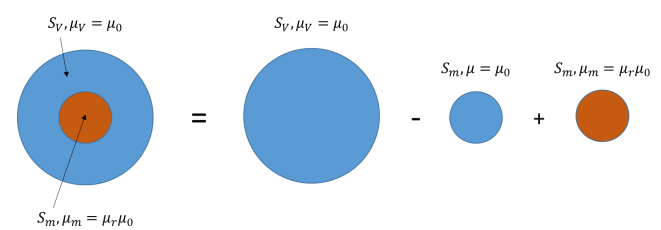

Figure 1: Superposition principle. Cross-section of the core made of two materials. Blue for air, orange
for ferromagnetic material.

From eq. 7 one can see that:

$$
\Phi' = \Phi_V \left[ 1+s(\mu_r-1) \right], \quad s = \frac{S_m}{S_V}
\tag{9}
$$
Where $s$
is the cross-section ratio between air core and ferromagnetic material core. By
placing (9) in (5) and (6) we shall obtain expressions for secondary coil inductance and
electromotive force when the coil core is composed of two materials.
$$
L' = L_V [1+ K s (\mu_r -1)]
\tag{10}
$$
$$
\varepsilon' = \varepsilon_V [1+ K s (\mu_r -1)]
\tag{11}
$$
Where $K$ is the correction factor to difference of length between the coil and the ferromagnetic
core.


## Heat capacity


When energy is added to the material and no work is performed, the material temperature is
rising, except the cases of phase transition.

The heat capacity of a certain body, $C$, defined as an amount of energy required to elevate the
body’s temperature by 1 degree Celsius.
$$
C  = \frac{\Delta Q}{\Delta T}
\tag{12}
$$
Specific heat capacity $c_p$ is the heat capacity per unit of mass.
$$
c_p = C / m  = \frac{\Delta Q}{m\Delta T}
\tag{13}
$$
The electrical power of the heat resistor (oven) is:
$$
P = I^2 R_{heater}
\tag{14}
$$
The power supplied continuously during time $t_{heating}$ supplies a core temperature change $\Delta T$
$$
P t_{heating} = \Delta Q = m c_p \delta T$
\tag{15}
$$

## Newton’s law of cooling

The expression describing the process of body’s cooling is known from 17th century. The cooling
rate is proportional to temperature difference between the body and the environment.

According to Newton’s law of cooling, the temporal change of the thermal energy is described
by the following equation:
$$
\frac{dQ(t)}{dt} = - \alpha A (T_{env} - T(t))
\tag{16}
$$
Where $\alpha$ is a proportional constant, $A$ is the heat transfer surface area, $T_{env}$ is the environment temperature and $T$ is the body’s temperature.

Placing (15) in to (16) we obtain the following differential equation:
$$
\dot T = -\frac{\alpha A}{m c_p} (T_{env} - T) = k (T_{env} - T)
\tag{17}
$$
The solution for the differential equation is:
$$
T(t) = T_{env} + (T(0) - T_{env}) e ^ {-kt}
\tag{18}
$$
Where $T(0)$ is the temperature of the body at time $t = 0$.

## Experimental setup

The goal of this experiment is measuring the induced electromotive force on the coil. Measuring
this force caused by the time dependent variation of the magnetic field flux as a function of the
temperature of the ferromagnetic piece, allows determining the Curie temperature of the material.

The system is contains two concentric coils, an oven and a ferromagnetic piece. The primary,
external coil is longer and has a larger radius then the secondary, inner coil (figure 2). The sample
piece (colored yellow on figure 2) is located on the common central axis, inside the secondary coil,
in an oven.


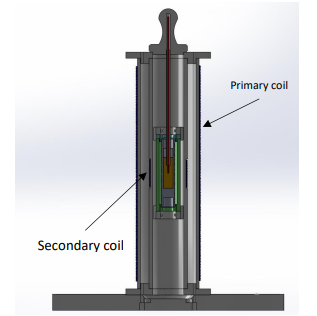

Figure 2: Cross-section of the experimental system. The external (longer) coil is the primary one. The
secondary coil is placed inside the primary coil. The sample piece is inserted into the secondary coil and
into the oven in its bottom.

### The oven and the magnetic core



The ferromagnetic core (the sample) is free-floating in the oven, thus heated uniformly.

The oven is made of two concentric, ceramic cylinders (aluminum silicate LAVA). The
ferromagnetic sample is located in the inner cylinder rapped by heating cord. The volume between
the cylinders is filled with thermal isolator to minimize the heating of the secondary coil
surrounding the oven.

The heating cord is works on DC current. The current value determining the cord heating rate and,
therefore, the sample heating rate. Increasing the current increases the heating rate. The
temperature is measured using thermocouple placed in the sample.

### Preparation questions

It is important to solve the following preparation questions to contribute to deeper understanding
and succeeding at the experiment.


#### Q1.

Given two concentric coils (figure 3). The larger radius coil is the primary one and the smaller
radius coil is the secondary one. The geometrical parameters of the coils are presented in table 1.


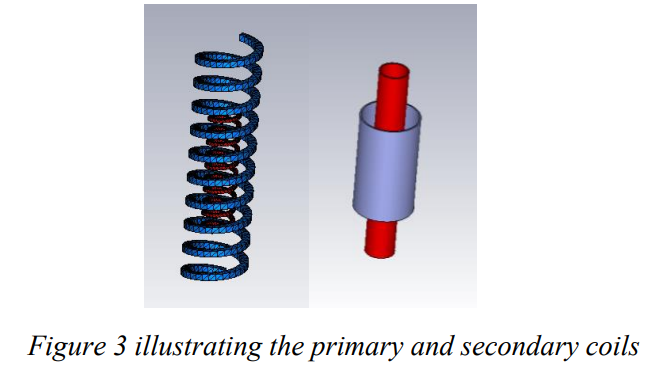

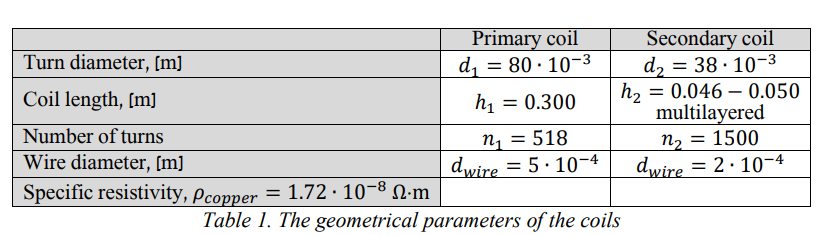

In [2]:
# Primary coil
r1 = 80e-3 /2 #m
h1 = 300e-3 #m
N1 = 518
dwire1 = 5e-4 #m

# Secondary coil
r2 = 38e-3 /2
h2 = 48e-3
N2 = 1500
dwire2 = 2e-4

# specific resistance of copper
rho = 1.72e-8 # Ohm m

**A.** Calculate the resistance of the primary (Rcoil1) and the secondary (Rcoil2) coils if they are
made of copper wire. Use the wire resistance equation.

**(EK)** The expected resistance is
$$
R = \rho \frac{l}{S}
$$
where $l = N \cdot 2\pi r$ - length of wire, $S = \pi d_{wire}^2 /4$ - wire cross-section.

In [3]:
def resistance(r, N, dwire, rho):
  section = np.pi * dwire**2 / 4
  length = 2* np.pi * r * N
  return rho / section * length

R1_ = resistance(r1, N1, dwire1, rho)
R2_= resistance(r2, N2, dwire2, rho)
print(f'R1 = {R1_:.1f} Ohm')
print(f'R2 = {R2_:.1f} Ohm')
#

R1 = 11.4 Ohm
R2 = 98.0 Ohm


In [4]:
# Resistance measurements
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/2025.09/R.txt'
devices, R1, R2 = np.loadtxt(url).T
print(f'Average R over {len(R1)} sets')
print(f'Expected R1 {R1_:.1f}, measured  {np.mean(R1):.1f} ± {np.std(R1):.1f} Ohm,')
print(f'Expected R2 {R2_:.1f}, measured  {np.mean(R2):.1f} ± {np.std(R2):.1f} Ohm')

Average R over 6 sets
Expected R1 11.4, measured  11.5 ± 0.1 Ohm,
Expected R2 98.0, measured  124.2 ± 2.0 Ohm


**B.** Calculate the inductance of the primary (Lcoil1) and the secondary (Lcoil2) coils

**(EK)** For simplicity we will use expression for long solenoid (height >> diameter) without Nagoki correction factor for finite-length solenoid.

$$
L = \mu_0 \mu \frac{N^2 A}{h}
$$
$N$ - number of loops, $A=\pi r^2$ - solenoid cross-section, $h$ - height of the coil.

Here $\mu$ is effective magnetic permeability:
$$
\mu = [1 + s (\mu_r - 1)]
$$
and $s$  is the cross-section ratio between air core and ferromagnetic material core.


In [5]:
def inductance(r, h, N, mu_r=1):
  s = (sample_radius / r)**2
  mu = 1 + s * (mu_r - 1)
  section = np.pi * r**2
  return mu0 * mu * N**2 * section / h

sample_radius = 12e-3 /2
# ferrite
mu_r_ferrite = 1500
mu_r_invar   = 3000
mu_r_air     = 1

print(f'Inductance expected')
for mu_r in [mu_r_air, mu_r_ferrite, mu_r_invar]:
  print(f'{mu_r = }')
  L1 = inductance(r1, h1, N1, mu_r)
  L2 = inductance(r2, h2, N2, mu_r)
  print(f'L1 = {L1*1e3:.1f} mH')
  print(f'L2 = {L2*1e3:.1f} mH\n')

Inductance expected
mu_r = 1
L1 = 5.6 mH
L2 = 66.8 mH

mu_r = 1500
L1 = 196.2 mH
L2 = 10053.1 mH

mu_r = 3000
L1 = 386.9 mH
L2 = 20046.1 mH



In [6]:
# L Measurements
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/2025.09/L.txt'
devices, samples, L1, L2, Lplus, Lminus = np.loadtxt(url).T
for sample in [0, 1, 2]:
  print(f'Sample {sample} - average')
  print(f'L1 = {np.mean(L1[samples == sample]):.1f} +- {np.std(L1[samples == sample]):.1f}mH')
  print(f'L2 = {np.mean(L2[samples == sample]):.1f} +- {np.std(L2[samples == sample]):.1f}mH\n')


Sample 0 - average
L1 = 5.5 +- 0.2mH
L2 = 84.5 +- 2.5mH

Sample 1 - average
L1 = 5.6 +- 0.1mH
L2 = 98.7 +- 3.4mH

Sample 2 - average
L1 = 5.7 +- 0.1mH
L2 = 110.4 +- 3.3mH



**C.** Using Biot-Savart law for finite coil case, write an expression for the magnetic field $B$ in
the center of the primary coil. If $V_P$ on the primary coil is 1V, find the value of the magnetic
field in its center?

Important to note: the internal resistance of the signal generator is 50Ω.
Use an expression for voltage divider.

**(EK)** Again for simplicity we assume long solenoid
$$
B = \mu_0  \mu_r \frac{N}{h} I
$$
and the current $I$ in the coil depends on impedance $Z = R_1 + j \omega L_1$:
$$
I =  \frac{V}{Z}
$$
For DC or low frequency current $Z\approx R_1$. In this case voltage divider expression is
$$
V = V_p \frac{R_1}{R_1 + R_{in}}
$$
$R_{in}$ - internal resistance.


> **(EK) comment**: The signal is passing to primary coil from the scope signal generator not directly but using amplifier. Addressing scope internal resistance  and using voltage divider model here is not correct.





In [7]:
# with voltage divider
mu_r = 1
Rin = 50
Vp = 1
V = Vp * R1_ / (R1_ + Rin)
B = mu0 * mu_r * N1 / h1 * V / R1_
print(f'B = {B*1e3:.3f} mT')

B = 0.035 mT


In [8]:
# direct calculation, without divider and internal resistance
Vp = 1
B = mu0 *mu_r * N1 / h1 * Vp / R1_
print(f'B = {B*1e3:.3f} mT')

B = 0.190 mT


**D.** Write an expression for the magnetic flux  in the primary $\Phi_1$ and secondary $\Phi_2$ coils.

**(EK)** Again to answer this question we have to know value of current $I$ in the primary coil, which for AC depends on frequency $\omega$. For DC current the question is senseless.
$$
\Phi_1 = L_1 I
$$

$$
\Phi_2 = M I
$$

$M$ - mutual inductance.

For coaxial solenoids in air mutual inductance expected value is
$$
M \approx \mu_0 N_1 N_2 \frac{A_2}{h_1}
$$

In [9]:
M = mu0 * N1 * N2 * np.pi * r2**2 / h1
print(f'Geometrical expectation for air core M = {M*1e3:.1f} mH')

# suggestion
f = 200 # Hz
print(f'At frequency: {f*1e-3:.1f} kHz')
omega = 2* np.pi * f
R1_ = resistance(r1, N1, dwire1, rho)
L1_ = inductance(r1, h1, N1, mu_r_air)
Z = np.sqrt(R1_**2 + (omega*L1_)**2 )
Vp = 1 #V
I = Vp / Z
Phi1 = L1_ * I
Phi2 = M * I

print(f'Phi1 = {Phi1*1e3:.2f} mH m2')
print(f'Phi2 = {Phi2*1e3:.2f} mH m2')

Geometrical expectation for air core M = 3.7 mH
At frequency: 0.2 kHz
Phi1 = 0.42 mH m2
Phi2 = 0.27 mH m2


## (EK)  Measuring mutual inductance $M$ directly

[source](https://www.uni-ruse.bg/disciplines/TE/Lecture%20notes/Lectures%20notes%20Mutually%20coupled%20inductors.pdf)

1. Measure each coil alone: $L_1$, $L_2$
2. Measure series-aiding connection $L_+$ (Expected $L_+ > L_1+L_2$).
3. Measure series-opposing connection $L_-$ (Expected $L_- < L_1+L_2$).
4. Compute $M$:
$$
M = \frac{L_+ + L_-}{4}
\tag{Mutual inductance}
$$


**E.** Calculate the transformation ratio between $V_P$ and $V_S$ using ideal transformer equation.




**(EK)** Primary terminals $ V_P = (R_1 + j \omega L_1) I$

Secondary open $V_s = j\omega M I$.

Thus
$$
\frac{V_s}{V_p} = \frac{j \omega M}{R_1 + j \omega L_1}
\tag{Expected response}
$$

**2.** At the first part of the experiment, you will be asked to measure the dependence of the VS on
the primary coil on the signal generator frequency. The characteristic dependence for to different
materials, invar and ferrite, is presented at figure 4.
Explore the graphs. Choose an optimal frequency for your measurements. Explain your reasons
and tradeoffs.

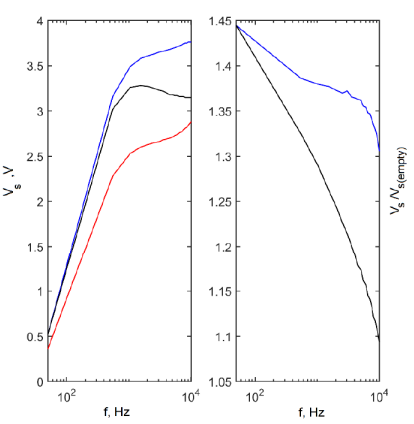

Figure 4. The left panel represents the voltage on the secondary coil as a function of the signal frequency
supplied to the primary coil. The red line corresponds to air core (empty cell), the black line corresponds
to invar core and the blue line to the ferrite core. The right panel represents the relative voltage on the
secondary coil, between empty cell (air core) and a sample. The black line for the invar core and the blue
line for the ferrite core.


**3.** The heating cord (oven) with parameters listed in table 2, is fed with DC voltage of 40V.


**3A.** Calculate the power build on the cord.

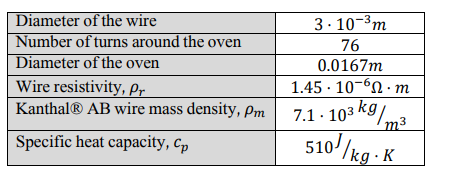

**(EK)** Power
$$
P = I V = V^2/R,\\
R = \rho_r \frac{l}{S}
$$
where $S$ - wire cross-section, $l$ - wire length

In [10]:
d = 3e-3  #m wire diameter
Nr = 76 # number of turns
r = 0.0167 / 2 #m - radius of the oven
rhor = 1.45e-6 # Ohm m resistivity
rhom = 7.1e3 # kg/m3 - density
cp = 510 # J / kg K - specific heat capacity
V = 40 #V voltage

length = 2 * np.pi * r * Nr
section = np.pi * d**2 / 4
volume = length * section
mass = volume * rhom
print(f'mass = {mass*1e3:.0f} g')
R = rhor / section * length
#R = resistance(r, Nr, d, rhor)
print(f'R = {R:.1f} Ohm')
I = V / R
print(f'I = {I:.1f} A')
P = V * I
print(f'Power (no current constrain) = {P:.1f} W')
# Current can not be 48A - it is limited by the power supply
I = 3 #A
print(f'If current limited by device I = {I:.1f} A')
P = V * I
print(f'P = {P:.1f} W')

mass = 200 g
R = 0.8 Ohm
I = 48.9 A
Power (no current constrain) = 1956.2 W
If current limited by device I = 3.0 A
P = 120.0 W


**B.** Calculate the temperature change rate.

**(EK) ** as follows from eq.(15)
$$
\frac{\Delta T}{dt} = \frac{P}{m c_P}
$$



**4. A.** Write an expression for body cooling, i.e. temperature as a function of time, using Newton’s
law of cooling.

**(EK)** As follows from (18)
$$
T - T_{env} = (T(0) - T_{env})e^{-kt}
\tag{cooling}
$$
where
$$
k = -\frac{\alpha A}{m c_p}
$$
$A$ - surface area, $\alpha$ - heat transfer coeficient, $m$ and $c_p$ are mass and specific heat of the sample.

$$
\alpha = \frac{k m c_P}{A}
$$

**4B.** Calculate the heat transfer coefficients α of the oven for the invar and the ferrite cores.

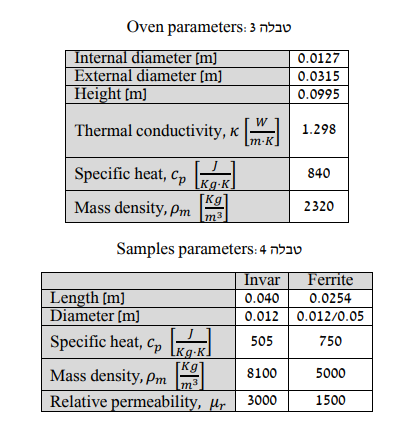

In [11]:
k = 1.298 # W / m K
# Invar sample
height   = 0.040 #m
diameter = 0.012
rhom = 8100 # kg/m3
cp = 505 # J / kg K
#
perimeter = np.pi * diameter
section = np.pi * diameter**2 / 4
surface = perimeter * height + 2 * section
volume = section * height
mass = rhom * volume
alpha = - k / surface * cp * mass
print(alpha)

-13850.788695652172


**5.** Calculate the amount of time required to elevate the temperature of 0.2 kg of water from 20 C0
to 100 C0
. The heating is performed using 2000 W electrical teapot. Conduct a home observation
measuring the time required to boil a room temperature water. Compere the obtained result with
the calculation.

**(EK)**

$$
Q = m c_p \Delta T\\
t = \frac{Q}{P}
$$

In [12]:
m = 0.2
cp = 4184
dT = 100 - 20
Q = m * cp * dT
P = 2000
time = Q / P
print(f'{time=:.0f} s')

time=33 s


**6.** A body cools from 550K
to room temperature of 300K. The decay constant is k = 0.5 sec-1.
Calculate the time required for cooling to 350K.

**(EK)** Newton's law of cooling
$$
T_1 - T_{env} = (T_0 - T_{env}) e^{-kt}
$$
and
$$
t = \frac{1}{k}  \ln \frac{T_1 - T_{env}}{T_0 - T_{env}}
$$


In [13]:
T0 = 550
T1 = 350
Tenv = 300
k = 0.5
t = 350
time = np.log( (T1 - Tenv) / (T0 - Tenv)) / k
print(f'{time=:.1f} s')

time=-3.2 s


#Experimental procedure


## Part A: measuring frequency response (about 15 minutes)


In [14]:
# L Measurements
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/2025.09/L.txt'
devices, samples, L1, L2, Lplus, Lminus = np.loadtxt(url).T

L1 *= 1e-3
L2 *= 1e-3
Lplus *= 1e-3
Lminus *= 1e-3
M = (Lplus - Lminus) / 4
for i, m in enumerate(M):
  print(f'M = {M[i]*1e3:.1f} mH set {devices[i]:.0f} sample {samples[i]:.0f}')

M = 6.1 mH set 9 sample 0
M = 7.1 mH set 9 sample 1
M = 8.1 mH set 9 sample 2
M = 6.4 mH set 10 sample 0
M = 7.5 mH set 10 sample 1
M = 8.5 mH set 10 sample 2
M = 6.4 mH set 6 sample 0
M = 7.5 mH set 6 sample 1
M = 8.4 mH set 6 sample 2
M = 6.4 mH set 4 sample 0
M = 7.7 mH set 4 sample 1
M = 8.6 mH set 4 sample 2
M = 6.3 mH set 13 sample 0
M = 7.5 mH set 13 sample 1
M = 8.4 mH set 13 sample 2
M = 6.4 mH set 2 sample 0
M = 7.7 mH set 2 sample 1
M = 8.6 mH set 2 sample 2


# Frequency response measurements

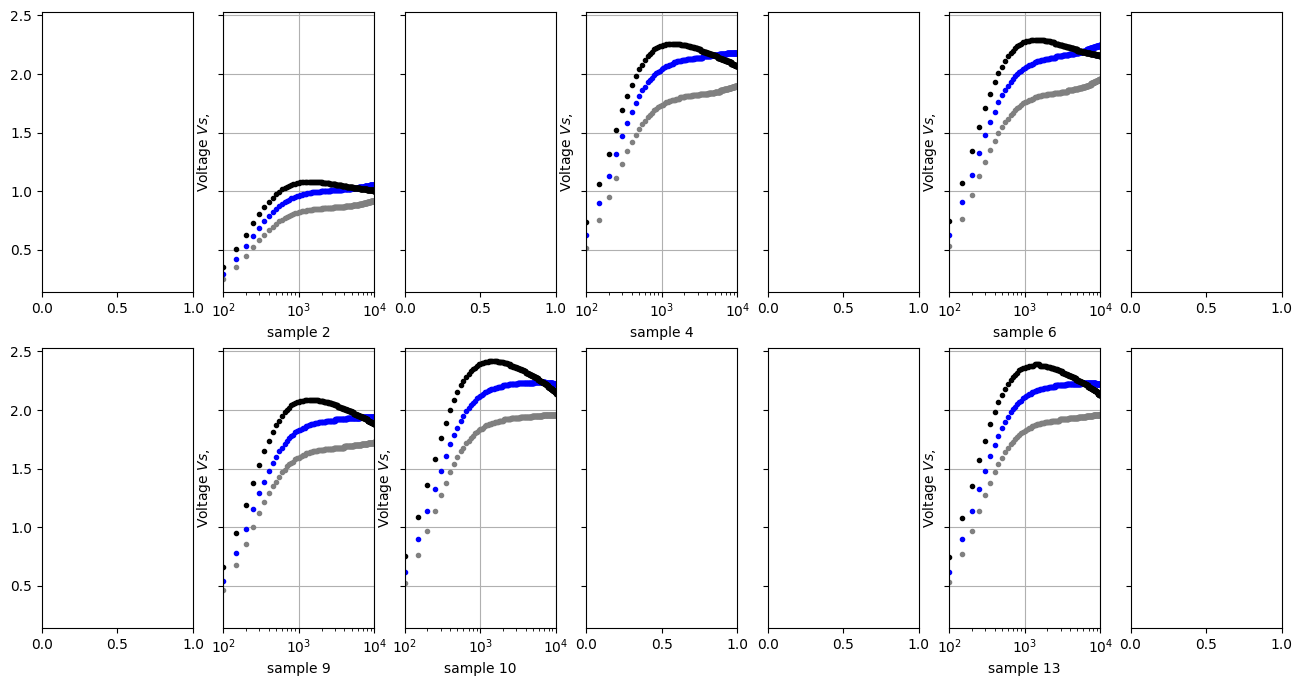

In [15]:
# Resistance measurements
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/2025.09/R.txt'
devicesR, R1, R2 = np.loadtxt(url).T

# Inductance Measurements
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/2025.09/L.txt'
devices, samples, L1, L2, Lplus, Lminus = np.loadtxt(url).T
L1 *= 1e-3
L2 *= 1e-3
Lplus *= 1e-3
Lminus *= 1e-3
M = (Lplus - Lminus) / 4


# frequency response measurements
URL = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/2025.09/{name}_f.csv'
MAX_FREQ = 1e4
colors = ['gray', 'blue', 'black']
Vp = 2

fig, ax = plt.subplots(2, 7, figsize=(16, 8), sharey=True)
for name in [2, 4, 6, 9, 10, 13]:
  row = (name - 1) // 7
  col = (name - 1) % 7
  axx = ax[row, col]
  url = URL.format(name=name)
  f, Vs0, Vs1, Vs2 = np.loadtxt(url, skiprows=1, delimiter=',').T

  for core in [0, 1, 2]:
    if core == 0:
      Vs = Vs0
    elif core == 1:
      Vs = Vs1
    else:
      Vs = Vs2

    axx.plot(f, Vs, color=colors[core], marker='.', ls='')

    axx.set_xscale('log')
    axx.set_xlabel(f'sample {name}')
    axx.set_ylabel(r'Voltage $Vs$,')
    #axx.legend()
    axx.grid()
    #plt.title('Expected vs observed response for air core (0) and samples 1,2')

    axx.set_xlim(100, MAX_FREQ)


# Set 13 frequency scan manually

(100, 50000.0)

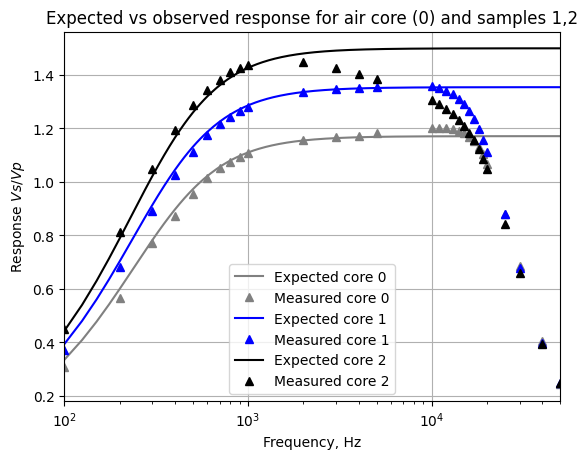

In [16]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/CU/frequency_scan_13.txt'
f, Vp, Vs0, Vs1, Vs2 = np.loadtxt(url).T
f *= 1e3 # -> Hz

MAX_FREQ = 50e3

# expected
colors = ['gray', 'blue', 'black']
freqs = np.linspace(100, MAX_FREQ, 2000)
for core in [0, 1, 2]:
  maskL = (devices == 13) & (samples == core);
  maskR = (devicesR == 13)
  M_  = M[maskL][0]
  L1_ = L1[maskL][0]
  R1_ = R1[maskR][0]
  ratio = [complex(0, omega * M_) / complex(R1_ , omega * L1_) for omega in 2*np.pi*freqs]

  plt.plot(freqs, np.abs(ratio), color=colors[core], label=f'Expected core {core}')
  if core == 0:
    Vs = Vs0
  elif core == 1:
    Vs = Vs1
  else:
    Vs = Vs2

  plt.plot(f, Vs/Vp, color=colors[core], marker='^', ls='',
           label=f'Measured core {core}')

plt.xscale('log')
plt.xlabel('Frequency, Hz')
plt.ylabel(r'Response $Vs/Vp$')
plt.legend()
plt.grid()
plt.title('Expected vs observed response for air core (0) and samples 1,2')

plt.xlim(100, MAX_FREQ)


**A8**. Measure the transformation ratio. Is the measured value corresponds to the one calculated
in preparation question 1. E?


**(EK)** The answer is yes, up to 10^3 Hz and somehow up to 10^4, and completely not after 10^4 Hz.

**A9.** For the case of ideal transformer, the phase shift between VP and VS in 900
. Does it fit the
experiment? Explain

**(EK)** Experimental data is not availiable

## Part B. Monitoring the heating and the cooling of ferrite core (about 30 minutes)

In [17]:
def survival_function(x, height, loc, sigma, offset):
    return height * norm.sf(x, loc, sigma) + offset


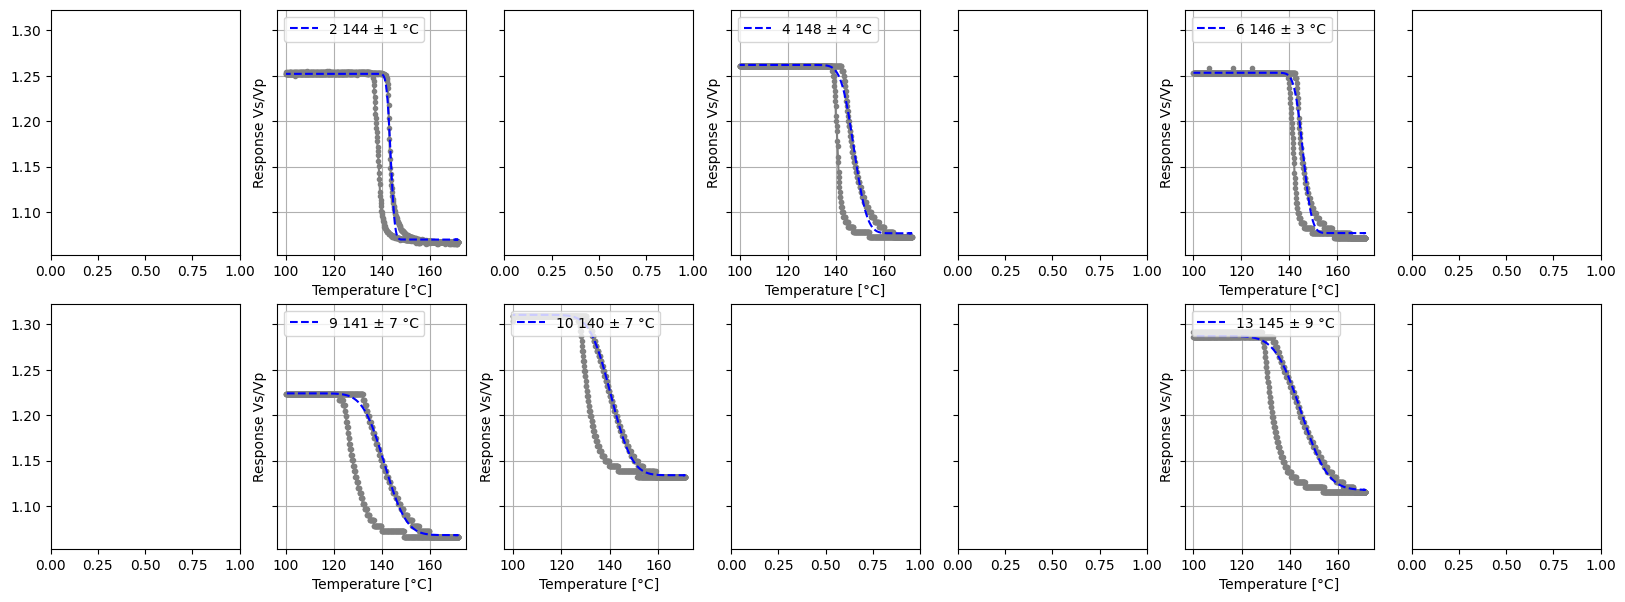

In [25]:
URL = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/2025.09/{name}_1.csv'
MIN_TEMP = 100

fig, ax = plt.subplots(2, 7, figsize=(20, 7), sharey=True)
for name in [2, 4, 6, 9, 10, 13]:
  row = (name - 1) // 7
  col = (name - 1) % 7
  axx = ax[row, col]
  url = URL.format(name=name)

  temp, Vp, Vs, V_heater = np.loadtxt(url, delimiter=',', usecols=[1,2,3,5], skiprows=8, unpack=True)
  response = Vs / Vp

  response = response[temp > MIN_TEMP]
  V_heater = V_heater[temp > MIN_TEMP]
  temp = temp[temp > MIN_TEMP]

  cooling = (V_heater == 0)
  temp_c = temp[cooling]
  response_c = response[cooling]

  # Fit the heating curve

  height = np.max(response) - np.min(response)
  offset = np.min(response)
  sigma = 10
  loc = np.max(temp) - sigma
  initial = [height, loc, sigma, offset]

  # Fit the cooling curve
  popt,  _ = curve_fit(survival_function, temp_c, response_c, p0=initial)


  Tc, Tc_sigma = popt[1], popt[2]
  axx.plot(temp, response, color='gray', marker='.')

  axx.plot(temp_c, survival_function(temp_c, *popt), 'b--',
          label=rf'{name} {Tc:.0f} ± {Tc_sigma:.0f} °C')
  axx.legend(loc='upper left')
  axx.grid()
  axx.set_xlabel('Temperature [°C]')
  axx.set_ylabel('Response Vs/Vp')


## Part D. Data analysis (at home)

**D1**.Draw graphs of induced voltage as a function of frequency using data gathered in part A.
Make use of logarithmic X axis. Place the three data sets (VS0, VS1, VS2) on the same graph.

(EK) Done, see PartA

**D2.** Calculate the resistance of the secondary coil using the solution of preparation question 1.
Compare it to the measured result

(EK) R2 = 98.0 Ohm calculated

In [19]:
# Expected
R2 = 98.0
# measured
R2 = 110

D3. Calculate the inductance of the secondary coil. Compare it to the measured result

In [20]:
# Exected, air core
L2 = 66.8 #mH
# observed
#L2 =

D4 What are the non-ideal factors influencing the temperature change rate?

D5. Draw a graph of the temperature as a function of time for N1. Fit it to the equation described
in preparation question 4 (regression). Note that there are two regions.

/tmp/ipython-input-3861672368.py:22: RuntimeWarning: overflow encountered in exp
  return Tenv + (T0 - Tenv) * np.exp(-k * (time - t0))
/tmp/ipython-input-3861672368.py:22: RuntimeWarning: overflow encountered in multiply
  return Tenv + (T0 - Tenv) * np.exp(-k * (time - t0))


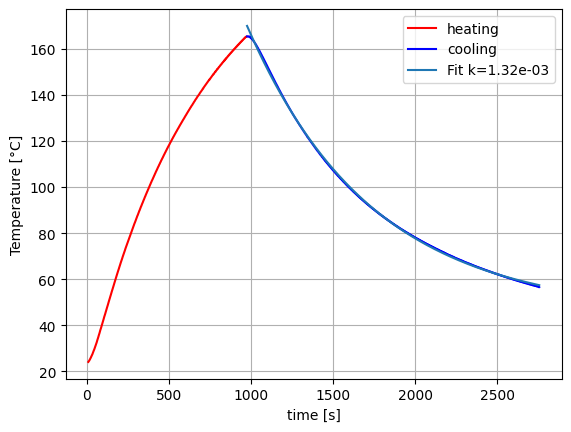

In [21]:
#set 12
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/set12_sample1/scan_N1.csv'
time_, temp, voltage = np.loadtxt(url, delimiter=',', skiprows=1, usecols=[0, 1, 2], unpack=True)

# skip 1st 10 seconbds
time = time_[time_>10]
temp = temp[time_>10]
voltage = voltage[time_>10]

# timeline
ix = np.argmax(temp)
t0 = time[ix]
temp_max = np.max(temp)
heating = time < t0
cooling = time > t0

plt.grid()
plt.ylabel('Temperature [°C]')
plt.xlabel('time [s]')

def cooling_law(time, k, T0, Tenv):
  return Tenv + (T0 - Tenv) * np.exp(-k * (time - t0))


initial = [0.5, 273 + 170, 300]
parameters, _ = curve_fit(cooling_law, time[cooling], temp[cooling], p0=initial)
temp_expected =  cooling_law(time[cooling], *parameters)
k = parameters[0]
plt.plot(time[heating], temp[heating],  label='heating',  color='red')
plt.plot(time[cooling], temp[cooling], label='cooling',  color='blue')
plt.plot(time[cooling], temp_expected, label=f'Fit k={k:.2e}')
plt.legend()

D6. Draw a graph of a temperature change as a function of temperature for N1.

In [22]:
def smooth(signal, window_size=30):
  # Create the kernel for a simple moving average
  # Each element in the window gets a weight of 1/window_size
  kernel = np.ones(window_size) / window_size
  # Perform the convolution
  smoothed_signal = np.convolve(signal, kernel, mode='same')
  return smoothed_signal

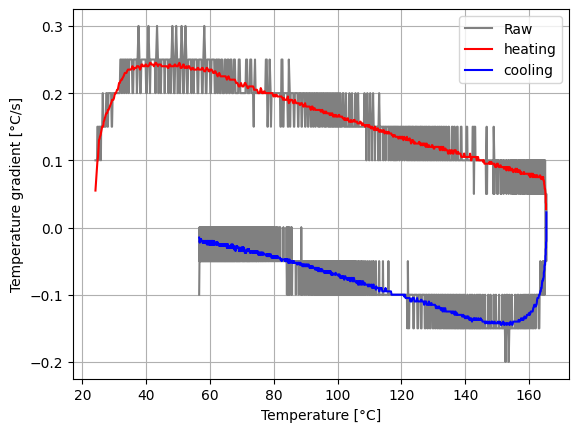

In [23]:
#set 12
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/set12_sample1/scan_N1.csv'
time_, temp, voltage = np.loadtxt(url, delimiter=',', skiprows=1, usecols=[0, 1, 2], unpack=True)

# skip 1st 10 seconbds
time = time_[time_>10]
temp = temp[time_>10]
voltage = voltage[time_>10]

# timeline
ix = np.argmax(temp)
t0 = time[ix]
temp_max = np.max(temp)
heating = time < t0
cooling = time > t0

dtemp = np.gradient(temp) / np.gradient(time)

plt.plot(temp, dtemp, color='gray', label='Raw')

plt.grid()
plt.xlabel('Temperature [°C]')
plt.ylabel('Temperature gradient [°C/s]')

dtemp_smoothed = smooth(dtemp,20)

plt.plot(temp[heating], dtemp_smoothed[heating], label='heating', color='red')
plt.plot(temp[cooling], dtemp_smoothed[cooling], label='cooling', color='blue')

plt.legend()

D7 Draw a graph of an induced voltage as a function of temperature for N1. Find the Curie
temperature for sample N1.

(EK) See graphs in Part C